In [1]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas as pd 
import numpy as np
import requests
import json
import glob
from pandas import DataFrame
import requests
import os
import sys
import datetime
from pandas import Series
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


# Data wrangling


### Gathering data

In [2]:
df_enhanced = pd.read_csv('twitter-archive-enhanced.csv')


In [4]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
response.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [6]:
response.encoding

'utf-8'

In [7]:
#saving content to file named image-predictions
with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)

In [8]:
img_pred=pd.read_csv('image-predictions.tsv', sep='\t')


In [9]:
tweet_info=pd.read_json('tweet-json.txt', lines=True)

### Assessing Data

In [10]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
tweet_info

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [15]:
df_enhanced.loc[df_enhanced['name'] == 'None'].count()

tweet_id                      745
in_reply_to_status_id          77
in_reply_to_user_id            77
timestamp                     745
source                        745
text                          745
retweeted_status_id            65
retweeted_status_user_id       65
retweeted_status_timestamp     65
expanded_urls                 686
rating_numerator              745
rating_denominator            745
name                          745
doggo                         745
floofer                       745
pupper                        745
puppo                         745
dtype: int64

In [16]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

In [17]:
df_enhanced[df_enhanced['name'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [18]:

duplicated=df_enhanced['name'][df_enhanced['name'].duplicated()]
duplicated.value_counts().head(20)

#many unreal names 

None       744
a           54
Charlie     11
Lucy        10
Cooper      10
Oliver      10
Lola         9
Penny        9
Tucker       9
Winston      8
Bo           8
the          7
Sadie        7
Daisy        6
Buddy        6
Toby         6
Bailey       6
an           6
Milo         5
Bella        5
Name: name, dtype: int64

In [19]:
all_dup=df_enhanced['name'].duplicated().sum()
all_dup

1399

In [20]:
name_none=df_enhanced.loc[df_enhanced['name'] =='None']

In [21]:
non_dup=name_none['name'].duplicated().sum()
non_dup

744

In [22]:
#duplicated names but without None values
dup=all_dup-non_dup
dup

655

In [23]:
df_enhanced['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
            ... 
Chef           1
Birf           1
Bayley         1
Kota           1
Scruffers      1
Name: name, Length: 957, dtype: int64

In [24]:
df_enhanced.tweet_id.value_counts().count()
#no duplicated in id 

2356

In [25]:
df_enhanced['expanded_urls'].duplicated().sum()

137

In [26]:
null_url=df_enhanced['expanded_urls'].isnull().sum()
null_url

59

In [27]:
img_pred['tweet_id'].is_unique

True

In [28]:
df_enhanced[df_enhanced['text'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [29]:
all_col=pd.Series(list(df_enhanced)+list(img_pred))
all_col[all_col.duplicated()]

17    tweet_id
dtype: object

In [30]:
df_enhanced['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [31]:
df_enhanced['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [32]:
img_pred.p1_dog[img_pred.p1_dog==True].count()


1532

In [33]:
img_pred.p1_dog[img_pred.p1_dog==False].count()

543

In [34]:
tweet_info['id'].nunique()
#so all columns are unique

2354

In [35]:
tweet_info['retweet_count'].value_counts()

1972     5
3652     5
83       5
146      4
61       4
        ..
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [36]:
tweet_info['favorite_count'].value_counts()

0        179
610        3
345        3
2918       3
1691       3
        ... 
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

### Quality issue:


- some missing values in columns 'doggo' , 'floofer' , 'pupper' ,'puppo' will extract it from 'text' column by extract('Regex')

- replace caps to lowercase values in columns 'doggo' , 'floofer' , 'pupper' ,'puppo' after extracting from text

- replace None values to null to be easy later (use isnull) in columns 'doggo' , 'floofer' , 'pupper' ,'puppo'

- replace None values to null to be easy later (use isnull) in name column

- change datatype of 'timestamp' , 'retweeted_status_timestamp' columns from string/object to datetime

- change all 'rating_denominator' column values to 10

- change all 'rating_numerator' column values to be large than 10 so the first number large than 10 is 11 , so will assign all values less than 10 to 11

- incorrect dog names so extract it from text column by extract('Regex')

- make breed column which contain name of breed of dog according to p1_dog which true 
- rename 'id' column in dataframe tweet_info into 'tweet_id'

### Tidiness issue:

- add new column called stage to save in it the dog stage which divided in 4 column 'doggo' , 'floofer' , 'pupper' ,'puppo' so merge them all in 1 colmn stage

- add 'jpg_url' , 'type' columns to df_enhanced dataframe  
- add 'retweet_count' , 'favorite_count' columns to df_enhanced dataframe 


### Cleaning data

##### Define
- extract stages values from text

#### code

In [37]:
df_enhanced['doggo'] = df_enhanced['text'].str.extract('\\b(doggo|Doggo)\\b', expand=True)[0]
df_enhanced['doggo'].value_counts()


doggo    86
Doggo     9
Name: doggo, dtype: int64

In [38]:
df_enhanced['floofer'] = df_enhanced['text'].str.extract('\\b(floofer|Floofer)\\b', expand=True)[0]
df_enhanced['floofer'].value_counts()


Floofer    6
floofer    4
Name: floofer, dtype: int64

In [39]:
df_enhanced['pupper'] = df_enhanced['text'].str.extract('\\b(pupper|Pupper)\\b', expand=True)[0]
df_enhanced['pupper'].value_counts()


pupper    247
Pupper      7
Name: pupper, dtype: int64

In [40]:
df_enhanced['puppo'] = df_enhanced['text'].str.extract('\\b(puppo|Puppo)\\b', expand=True)[0]
df_enhanced['puppo'].value_counts()


puppo    29
Name: puppo, dtype: int64

##### Test
 

In [41]:
print(df_enhanced['doggo'].value_counts())
print(df_enhanced['floofer'].value_counts())
print(df_enhanced['pupper'].value_counts())
print(df_enhanced['puppo'].value_counts())

doggo    86
Doggo     9
Name: doggo, dtype: int64
Floofer    6
floofer    4
Name: floofer, dtype: int64
pupper    247
Pupper      7
Name: pupper, dtype: int64
puppo    29
Name: puppo, dtype: int64


##### Define
- replace capitalcase to lowercase in 4 stages 

#### Code

In [42]:
df_enhanced.doggo.replace("Doggo","doggo",inplace=True)
df_enhanced.puppo.replace("Puppo","puppo",inplace=True)
df_enhanced.pupper.replace("Pupper","pupper",inplace=True)
df_enhanced.floofer.replace("Floofer","floofer",inplace=True)



##### Test
 

In [43]:
print(df_enhanced['doggo'].value_counts())
print(df_enhanced['floofer'].value_counts())
print(df_enhanced['pupper'].value_counts())
print(df_enhanced['puppo'].value_counts())

doggo    95
Name: doggo, dtype: int64
floofer    10
Name: floofer, dtype: int64
pupper    254
Name: pupper, dtype: int64
puppo    29
Name: puppo, dtype: int64


##### Define
- replace None values to Null in 4 stages 

#### Code

In [44]:
df_enhanced['doggo'].replace(to_replace=[None], value=np.nan, inplace=True)
df_enhanced['floofer'].replace(to_replace=[None], value=np.nan, inplace=True)
df_enhanced['pupper'].replace(to_replace=[None], value=np.nan, inplace=True)
df_enhanced['puppo'].replace(to_replace=[None], value=np.nan, inplace=True)

##### Test
 

In [45]:
print(df_enhanced['doggo'].isnull().sum())
print(df_enhanced['floofer'].isnull().sum())
print(df_enhanced['pupper'].isnull().sum())
print(df_enhanced['puppo'].isnull().sum())

2261
2346
2102
2327


##### Define
- replace None values to Null in name column 

#### Code

In [46]:
df_enhanced['name'].replace(to_replace=['None'], value=np.nan, inplace=True)


#### Test

In [47]:
print(df_enhanced['name'].value_counts())
print(df_enhanced['name'].isnull().sum())

a          55
Charlie    12
Lucy       11
Oliver     11
Cooper     11
           ..
Bayley      1
Kota        1
Chloe       1
Jeb         1
O           1
Name: name, Length: 956, dtype: int64
745


In [48]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         95 non-null object
floofer                       10 non-null object
pupper                        254 non-null object
puppo                         29 non-null object
dtypes: float64(4), int64(3), object(10

##### Define
- change 'timestamp' coulmn datatype from string / object to datetime 
-  change 'retweeted_status_timestamp' coulmn datatype from string / object to datetime 

#### Code

In [49]:
df_enhanced['timestamp']=pd.to_datetime(df_enhanced['timestamp'])

In [50]:
df_enhanced['retweeted_status_timestamp']=pd.to_datetime(df_enhanced['retweeted_status_timestamp'])

#### Test

#### Define
- change all 'rating_denominator' column values to 10
- change all 'rating_numerator' column assign all values 11

#### Code

In [51]:
df_enhanced['rating_denominator'][df_enhanced['rating_denominator'] != 10] =10

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
df_enhanced['rating_numerator'][df_enhanced['rating_numerator'] <= 10] = 11

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Test

In [53]:
df_enhanced['rating_denominator'].value_counts()

10    2356
Name: rating_denominator, dtype: int64

In [54]:
df_enhanced['rating_numerator'].value_counts()

11      1365
12       558
13       351
14        54
15         2
420        2
75         2
27         1
88         1
121        1
20         1
24         1
26         1
44         1
50         1
60         1
80         1
84         1
144        1
17         1
182        1
204        1
143        1
666        1
960        1
1776       1
99         1
45         1
165        1
Name: rating_numerator, dtype: int64

#### Define
- extract dog name from 'text' column

#### Code

In [55]:
df_enhanced['name']=df_enhanced['text'].str.extract('((This is|Meet) ([A-Z][a-z]*)\\.)',expand=True)[2]

#### Test

In [56]:
df_enhanced['name'].value_counts()

Charlie     11
Lola        10
Tucker      10
Lucy        10
Cooper       9
            ..
Patch        1
Ridley       1
Pluto        1
Florence     1
Taco         1
Name: name, Length: 830, dtype: int64

In [57]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns, UTC]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1319 non-null object
doggo                         95 non-null object
floofer                       10 non-null object
pupper                        254 non-null object
puppo                         29 non-null object
dtypes: datet

#### Define
- make breed column 

#### Code

In [58]:
tmp = img_pred[(img_pred.p1_dog == True) | (img_pred.p2_dog == True) | (img_pred.p3_dog == True)]

tmp2 = tmp[((tmp.p1_dog == True) | ((tmp.p1_dog == False) & (tmp.p2_dog == True) & (tmp.p3_dog == True)))]

img_pred = tmp2[((tmp2.p1_conf < tmp2.p2_conf + tmp2.p3_conf) & (tmp2.p1_dog == False)) | (tmp2.p1_dog == True)]

In [59]:
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [60]:
img_pred["breed"] = None

img_pred.breed[img_pred['p1_dog'] == True] = img_pred[img_pred['p1_dog'] == True].p1

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pc\Anaconda3\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.o

#### Test

In [61]:
img_pred['breed'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
EntleBucher             1
silky_terrier           1
standard_schnauzer      1
clumber                 1
Japanese_spaniel        1
Name: breed, Length: 111, dtype: int64

#### Define
- merge all 4 variables of dog stages in 1 variable column

#### Code

In [62]:
df_enhanced["stage"] = (df_enhanced.doggo.fillna("")+df_enhanced.floofer.fillna("")+df_enhanced.pupper.fillna("")+df_enhanced.puppo.fillna(""))

In [63]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns, UTC]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1319 non-null object
doggo                         95 non-null object
floofer                       10 non-null object
pupper                        254 non-null object
puppo                         29 non-null object
stage        

In [64]:
df_enhanced["stage"] = df_enhanced["stage"].replace("",np.nan)

In [65]:
#because text contain doggo which first stage 
df_enhanced.stage.replace("doggopupper","doggo",inplace=True)
df_enhanced.stage.replace("doggofloofer","doggo",inplace=True)
df_enhanced.stage.replace("doggopuppo","doggo",inplace=True)

#### Test

In [66]:
df_enhanced["stage"].value_counts()

pupper     243
doggo       95
puppo       28
floofer      9
Name: stage, dtype: int64

#### Define
- rename column 'id' in dataframe tweet_info to be 'tweet_id'

#### code 

In [67]:
tweet_info.rename(columns={'id': 'tweet_id'},inplace=True)

#### test

In [68]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
tweet_id                         2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

#### Define 
- join from dataframe tweet_info the 2 columns 'retweet_count' , 'favorite_count' to df_enhanced dataframe 

#### code

In [69]:
df_enhanced = pd.merge(df_enhanced,
                 tweet_info[['retweet_count', 'favorite_count','tweet_id']],
                 on='tweet_id', 
                 how='left')

#### Test

In [70]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns, UTC]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1319 non-null object
doggo                         95 non-null object
floofer                       10 non-null object
pupper                        254 non-null object
puppo                         29 non-null object
stage        

#### Define
- add 'jpg_url' ,'breed' to df_enhanced dataframe

#### Code

In [71]:
#merge
df_enhanced = pd.merge(df_enhanced,img_pred[['tweet_id','jpg_url','breed']],on="tweet_id")

In [72]:
#then drop 'jpg_url' ,'breed' from img_pred table
img_pred.drop('jpg_url', axis=1,inplace=True)
img_pred.drop('breed', axis=1,inplace=True)



C:\Users\pc\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


####  Test

In [73]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 0 to 1555
Data columns (total 22 columns):
tweet_id                      1556 non-null int64
in_reply_to_status_id         14 non-null float64
in_reply_to_user_id           14 non-null float64
timestamp                     1556 non-null datetime64[ns, UTC]
source                        1556 non-null object
text                          1556 non-null object
retweeted_status_id           57 non-null float64
retweeted_status_user_id      57 non-null float64
retweeted_status_timestamp    57 non-null datetime64[ns, UTC]
expanded_urls                 1556 non-null object
rating_numerator              1556 non-null int64
rating_denominator            1556 non-null int64
name                          952 non-null object
doggo                         62 non-null object
floofer                       8 non-null object
pupper                        160 non-null object
puppo                         19 non-null object
stage             

In [74]:
df_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,stage,retweet_count,favorite_count,jpg_url,breed
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,Tilly,NaN,NaN,NaN,NaN,NaN,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,Archie,NaN,NaN,NaN,NaN,NaN,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
2,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,Franklin,NaN,NaN,NaN,NaN,NaN,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
3,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,...,NaN,NaN,NaN,NaN,NaN,NaN,3261.0,20562.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever
4,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,Jax,NaN,NaN,NaN,NaN,NaN,2158.0,12041.0,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller


In [75]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 0 to 2073
Data columns (total 11 columns):
tweet_id    1556 non-null int64
img_num     1556 non-null int64
p1          1556 non-null object
p1_conf     1556 non-null float64
p1_dog      1556 non-null bool
p2          1556 non-null object
p2_conf     1556 non-null float64
p2_dog      1556 non-null bool
p3          1556 non-null object
p3_conf     1556 non-null float64
p3_dog      1556 non-null bool
dtypes: bool(3), float64(3), int64(2), object(3)
memory usage: 154.0+ KB


## saving cleaned data 
- save cleaned data to csv file called twitter_archive_master

In [76]:
cleaned = df_enhanced
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 0 to 1555
Data columns (total 22 columns):
tweet_id                      1556 non-null int64
in_reply_to_status_id         14 non-null float64
in_reply_to_user_id           14 non-null float64
timestamp                     1556 non-null datetime64[ns, UTC]
source                        1556 non-null object
text                          1556 non-null object
retweeted_status_id           57 non-null float64
retweeted_status_user_id      57 non-null float64
retweeted_status_timestamp    57 non-null datetime64[ns, UTC]
expanded_urls                 1556 non-null object
rating_numerator              1556 non-null int64
rating_denominator            1556 non-null int64
name                          952 non-null object
doggo                         62 non-null object
floofer                       8 non-null object
pupper                        160 non-null object
puppo                         19 non-null object
stage             

In [77]:
#save cleaned data to : twitter_archive_master.csv
cleaned.to_csv('twitter_archive_master.csv')

## Data analysis

In [78]:
cleaned.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1.556000e+03,1.400000e+01,1.400000e+01,5.700000e+01,5.700000e+01,1556.000000,1556.0,1555.000000,1555.000000
mean,7.425659e+17,6.950829e+17,4.196984e+09,7.634965e+17,1.381512e+16,12.222365,10.0,3009.084244,8916.656592
std,6.854457e+16,4.947686e+16,0.000000e+00,5.655626e+16,1.043019e+17,7.485594,0.0,5143.906460,12456.821539
min,6.660209e+17,6.671522e+17,4.196984e+09,6.675094e+17,5.128045e+08,11.000000,10.0,16.000000,0.000000
25%,6.787273e+17,6.724958e+17,4.196984e+09,7.258423e+17,4.196984e+09,11.000000,10.0,668.000000,1869.500000
50%,7.191522e+17,6.755284e+17,4.196984e+09,7.776842e+17,4.196984e+09,11.000000,10.0,1505.000000,4181.000000
75%,7.986727e+17,6.901517e+17,4.196984e+09,7.961497e+17,4.196984e+09,12.000000,10.0,3505.500000,11306.000000
max,8.921774e+17,8.558181e+17,4.196984e+09,8.874740e+17,7.874618e+17,165.000000,10.0,79515.000000,132810.000000


In [79]:
cleaned.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,stage,retweet_count,favorite_count,jpg_url,breed
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,Tilly,NaN,NaN,NaN,NaN,NaN,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,Archie,NaN,NaN,NaN,NaN,NaN,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
2,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,Franklin,NaN,NaN,NaN,NaN,NaN,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
3,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,...,NaN,NaN,NaN,NaN,NaN,NaN,3261.0,20562.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever
4,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,Jax,NaN,NaN,NaN,NaN,NaN,2158.0,12041.0,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller


In [81]:
cleaned.groupby(["stage"])['rating_numerator','retweet_count','favorite_count'].agg(['count','min','max','sum','mean','median','std'])

rating_numerator                                            \
                   count min max   sum       mean median       std   
stage                                                                
doggo                 62  11  14   755  12.177419     12  0.983873   
floofer                7  11  13    85  12.142857     12  0.899735   
pupper               151  11  27  1757  11.635762     11  1.485411   
puppo                 18  11  14   220  12.222222     12  0.942809   

        retweet_count                  ...                                     \
                count    min      max  ...         mean  median           std   
stage                                  ...                                      
doggo              62  725.0  79515.0  ...  8034.193548  3380.0  13747.858311   
floofer             7  496.0  18497.0  ...  4968.714286  3265.0   6163.579715   
pupper            151   83.0  32883.0  ...  2694.417219  1219.0   4042.768413   
puppo              18  716.0  48265.0  ...  6675.500000  2509.0  11405.886861   

        favorite_count                                                      \
                 count     min       max        sum          mean   median   
stage                                                                        
doggo               62     0.0  131075.0  1143880.0  18449.677419  10493.5   
floofer              7  2262.0   33345.0    92442.0  13206.000000  11302.0   
pupper             151     0.0  106827.0  1178243.0   7802.933775   3345.0   
puppo               18  3277.0  132810.0   404093.0  22449.611111  11309.5   

                       
                  std  
stage                  
doggo    23061.938847  
floofer  11258.315105  
pupper   11908.530181  
puppo    30956.915778  

[4 rows x 21 columns]

In [82]:
cleaned.groupby(["stage","breed"])['rating_numerator','retweet_count','favorite_count'].mean().min()

rating_numerator     11.0
retweet_count       265.0
favorite_count      769.0
dtype: float64

In [83]:
cleaned.groupby(["stage","breed"])['rating_numerator','retweet_count','favorite_count'].mean().max()

rating_numerator        27.0
retweet_count        52360.0
favorite_count      132810.0
dtype: float64

In [84]:
cleaned.groupby(["stage","breed"])['rating_numerator','retweet_count','favorite_count'].agg(['count','min','max','sum','mean','median','std'])

rating_numerator                           \
                                          count min max sum  mean median   
stage breed                                                                
doggo Bedlington_terrier                      2  11  14  25  12.5   12.5   
      Blenheim_spaniel                        1  11  11  11  11.0   11.0   
      Border_collie                           1  13  13  13  13.0   13.0   
      Chesapeake_Bay_retriever                1  13  13  13  13.0   13.0   
      Chihuahua                               1  12  12  12  12.0   12.0   
...                                         ...  ..  ..  ..   ...    ...   
puppo Rottweiler                              1  14  14  14  14.0   14.0   
      chow                                    1  11  11  11  11.0   11.0   
      golden_retriever                        2  13  13  26  13.0   13.0   
      malamute                                1  11  11  11  11.0   11.0   
      miniature_pinscher                      1  12  12  12  12.0   12.0   

                                        retweet_count                    ...  \
                                    std         count      min      max  ...   
stage breed                                                              ...   
doggo Bedlington_terrier        2.12132             2   1263.0   2554.0  ...   
      Blenheim_spaniel              NaN             1   1104.0   1104.0  ...   
      Border_collie                 NaN             1   2506.0   2506.0  ...   
      Chesapeake_Bay_retriever      NaN             1   4376.0   4376.0  ...   
      Chihuahua                     NaN             1   3327.0   3327.0  ...   
...                                 ...           ...      ...      ...  ...   
puppo Rottweiler                    NaN             1  19669.0  19669.0  ...   
      chow                          NaN             1   1759.0   1759.0  ...   
      golden_retriever          0.00000             2   1704.0   2321.0  ...   
      malamute                      NaN             1   1366.0   1366.0  ...   
      miniature_pinscher            NaN             1   3220.0   3220.0  ...   

                                                             favorite_count  \
                                   mean   median         std          count   
stage breed                                                                   
doggo Bedlington_terrier         1908.5   1908.5  912.874855              2   
      Blenheim_spaniel           1104.0   1104.0         NaN              1   
      Border_collie              2506.0   2506.0         NaN              1   
      Chesapeake_Bay_retriever   4376.0   4376.0         NaN              1   
      Chihuahua                  3327.0   3327.0         NaN              1   
...                                 ...      ...         ...            ...   
puppo Rottweiler                19669.0  19669.0         NaN              1   
      chow                       1759.0   1759.0         NaN              1   
      golden_retriever           2012.5   2012.5  436.284884              2   
      malamute                   1366.0   1366.0         NaN              1   
      miniature_pinscher         3220.0   3220.0         NaN              1   

                                                                             \
                                    min      max      sum     mean   median   
stage breed                                                                   
doggo Bedlington_terrier         4238.0  13864.0  18102.0   9051.0   9051.0   
      Blenheim_spaniel           4228.0   4228.0   4228.0   4228.0   4228.0   
      Border_collie              9390.0   9390.0   9390.0   9390.0   9390.0   
      Chesapeake_Bay_retriever  12376.0  12376.0  12376.0  12376.0  12376.0   
      Chihuahua                 16476.0  16476.0  16476.0  16476.0  16476.0   
...                                 ...      ...      ...      ...      ...   
puppo Rottweiler           

## data visualization


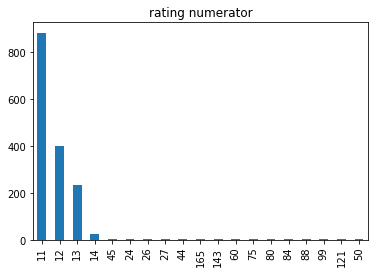

In [85]:
cleaned['rating_numerator'].value_counts().plot(kind="bar",title = "rating numerator")

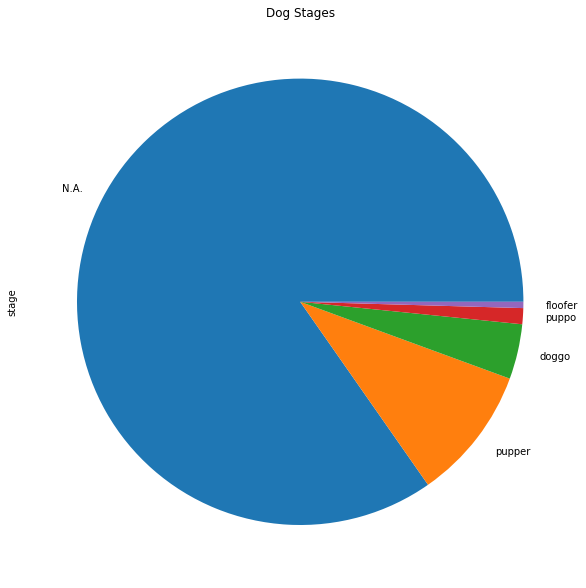

In [86]:
cleaned['stage'].fillna("N.A.").value_counts().plot(kind="pie",title="Dog Stages",figsize=(10,15))

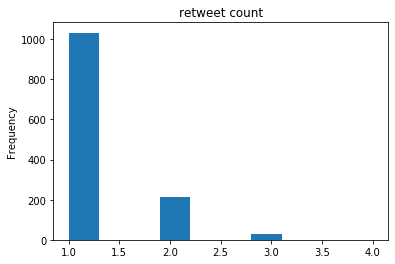

In [87]:
cleaned['retweet_count'].value_counts().plot(kind="hist",title = "retweet count")



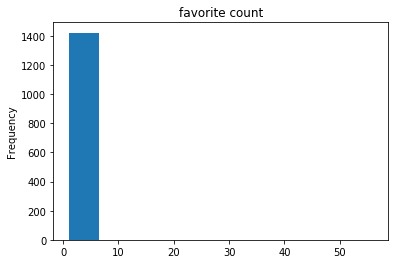

In [88]:
cleaned['favorite_count'].value_counts().plot(kind="hist",title = "favorite count")



C:\Users\pc\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


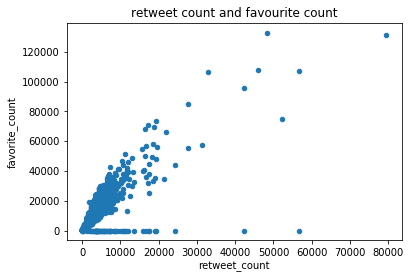

In [89]:
cleaned.plot(kind="scatter",x="retweet_count",y="favorite_count",title='retweet count and favourite count')

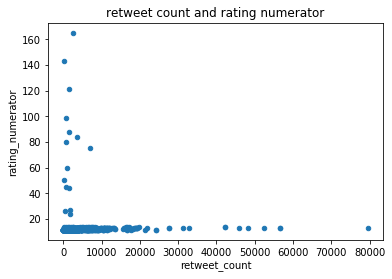

In [90]:
cleaned.plot(kind="scatter",x="retweet_count",y="rating_numerator",title='retweet count and rating numerator')

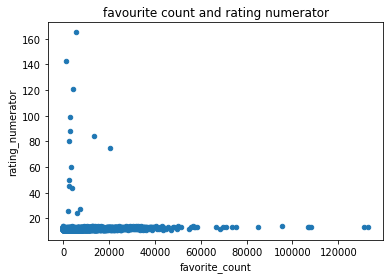

In [91]:
cleaned.plot(kind="scatter",x="favorite_count",y="rating_numerator",title='favourite count and rating numerator')